In [1]:
# the raw outputs are based on GRP. move them to a new folder

In [2]:
import os, glob, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

basins and clusters match
Number 45
[467 494 495 496 497 498 508 509 510 511 512 513 514 515 516 517 518 521
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 554 609 620 621 622 624 625 626]


/glade/derecho/scratch/guoqiang/tmp/ipykernel_36532/3121899047.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_cluster2.sel_index = np.arange(len(df_cluster2))


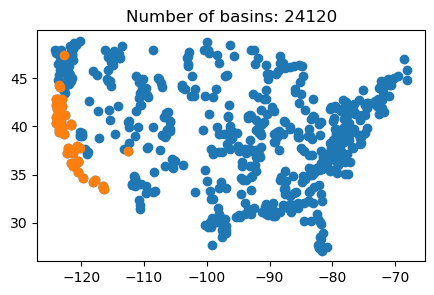

In [3]:
# target basins from a cluster

# load basin info
infile_basin_info = f"/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv"
df_info = pd.read_csv(infile_basin_info)

# load cluster info
infile = "../camels_cluster/Manuela_Brunner_2020/flood_cluster_memberships_CAMELS.txt"
df_cluster = pd.read_csv(infile)
df_cluster = df_cluster.rename(
    columns={"Camels_IDs": "hru_id", "flood_cluster": "clusters"}
)
df_cluster2 = pd.DataFrame()

for id in df_info["hru_id"].values:
    dfi = df_cluster.loc[df_cluster["hru_id"] == id]
    df_cluster2 = pd.concat([df_cluster2, dfi])

df_cluster2.sel_index = np.arange(len(df_cluster2))
df_cluster = df_cluster2
del df_cluster2
df_cluster["clusters"] = df_cluster["clusters"] - 1  # starting from 0

if np.any(df_info["hru_id"].values - df_cluster['hru_id'].values != 0):
    print("Mistmatch between basins and clusters")
else:
    print("basins and clusters match")

# select a cluster
sel_cluster = 2
sel_index = df_cluster["clusters"].values == sel_cluster
sel_index = np.where(sel_index)[0]
print('Number', len(sel_index))
print(sel_index)



plt.figure(figsize=[5, 3])
plt.scatter(df_info["lon_cen"], df_info["lat_cen"])
plt.scatter(df_info["lon_cen"].values[sel_index], df_info["lat_cen"].values[sel_index])
plt.title(f"Number of basins: {np.sum(sel_index)}")
plt.show()


In [4]:
# back up files

path = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
tariters = ['iter1', 'iter2']

for b in sel_index:
    if True:
        infolder = f'{path}/level1_{b}_MOASMOcalib/ctsm_outputs'
        outfolder = f'{path}/level1_{b}_MOASMOcalib/RF_allbasinemula_out/ctsm_outputs'
        _ = os.makedirs(outfolder, exist_ok=True)
        for it in tariters:
            _ = os.system(f'mv {infolder}/*{it}* {outfolder}/')
            # _ = os.system(f'rm -r {infolder}/*{it}*')
    
        infolder = f'{path}/level1_{b}_MOASMOcalib/param_sets'
        outfolder = f'{path}/level1_{b}_MOASMOcalib/RF_allbasinemula_out/param_sets'
        _ = os.makedirs(outfolder, exist_ok=True)
        for it in tariters:
            _ = os.system(f'mv {infolder}/*{it}* {outfolder}/')
            # _ = os.system(f'rm -r {infolder}/*{it}*')
        

mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_467_MOASMOcalib/ctsm_outputs/*iter2*': No such file or directory
mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_494_MOASMOcalib/ctsm_outputs/*iter2*': No such file or directory
mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_495_MOASMOcalib/ctsm_outputs/*iter2*': No such file or directory
mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_496_MOASMOcalib/ctsm_outputs/*iter2*': No such file or directory
mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_497_MOASMOcalib/ctsm_outputs/*iter2*': No such file or directory
mv: cannot stat '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_498_MOASMOcalib/ctsm_outputs/*iter2*': 

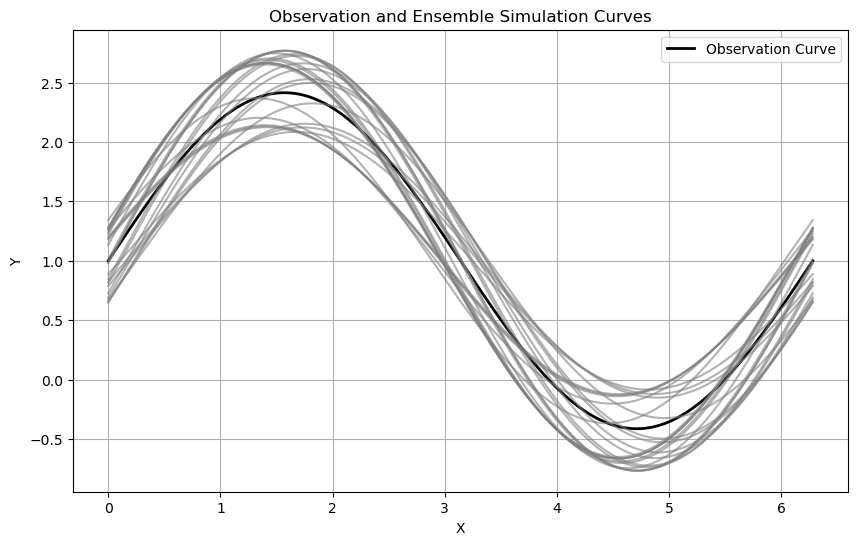

Actual Observation Mean: 1.0
Actual Observation Standard Deviation: 0.9994998749374611


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for observation curve
obs_mean = 1.0
obs_std_dev = 1.0
obs_amplitude = obs_std_dev * np.sqrt(2)  # Amplitude to achieve the desired standard deviation
num_points = 1000  # Number of points in the curve
x = np.linspace(0, 2 * np.pi, num_points)

# Generate observation curve
obs_y = obs_mean + obs_amplitude * np.sin(x)

# Parameters for ensemble simulations
ensemble_size = 25
sim_std_dev = 0.25  # Assuming the standard deviation of the simulations is smaller
sim_amplitude = sim_std_dev * np.sqrt(2)  # Amplitude to achieve the desired standard deviation

# Generate ensemble curves
sim_y = np.array([obs_y + sim_amplitude * np.sin(x + np.random.uniform(0, 2 * np.pi)) for _ in range(ensemble_size)])

# Plot the observation and ensemble curves
plt.figure(figsize=(10, 6))
plt.plot(x, obs_y, label='Observation Curve', color='black', linewidth=2)
for i in range(ensemble_size):
    plt.plot(x, sim_y[i], color='grey', alpha=0.6)

plt.title('Observation and Ensemble Simulation Curves')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate actual mean and standard deviation for verification
actual_obs_mean = np.mean(obs_y)
actual_obs_std_dev = np.std(obs_y)

print(f"Actual Observation Mean: {actual_obs_mean}")
print(f"Actual Observation Standard Deviation: {actual_obs_std_dev}")
